In [1]:
import pandas as pd

traffic=pd.read_csv("..\\my_datasets\\traffic_sao_paulo.csv",sep=';')
print(traffic.head(2))
print('-----------------')
print(traffic.tail())

   Hour (Coded)  Immobilized bus  Broken Truck  Vehicle excess  \
0             1                0             0               0   
1             2                0             0               0   

   Accident victim  Running over  Fire vehicles  Occurrence involving freight  \
0                0             0              0                             0   
1                0             0              0                             0   

   Incident involving dangerous freight  Lack of electricity  Fire  \
0                                     0                    0     0   
1                                     0                    0     0   

   Point of flooding  Manifestations  Defect in the network of trolleybuses  \
0                  0               0                                      0   
1                  0               0                                      0   

   Tree on the road  Semaphore off  Intermittent Semaphore  \
0                 0              0            

In [2]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Hour (Coded)                           135 non-null    int64 
 1   Immobilized bus                        135 non-null    int64 
 2   Broken Truck                           135 non-null    int64 
 3   Vehicle excess                         135 non-null    int64 
 4   Accident victim                        135 non-null    int64 
 5   Running over                           135 non-null    int64 
 6   Fire vehicles                          135 non-null    int64 
 7   Occurrence involving freight           135 non-null    int64 
 8   Incident involving dangerous freight   135 non-null    int64 
 9   Lack of electricity                    135 non-null    int64 
 10  Fire                                   135 non-null    int64 
 11  Point of flooding  

In [3]:
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].str.replace(',', '.')
traffic['Slowness in traffic (%)'] = traffic['Slowness in traffic (%)'].astype(float)


In [4]:
print(traffic['Slowness in traffic (%)'].describe())


count    135.000000
mean      10.051852
std        4.363243
min        3.400000
25%        7.400000
50%        9.000000
75%       11.850000
max       23.400000
Name: Slowness in traffic (%), dtype: float64


In [5]:
import matplotlib.pyplot as plt

(array([16., 17., 38., 27., 13.,  6.,  4.,  7.,  3.,  4.]),
 array([ 3.4,  5.4,  7.4,  9.4, 11.4, 13.4, 15.4, 17.4, 19.4, 21.4, 23.4]),
 <BarContainer object of 10 artists>)

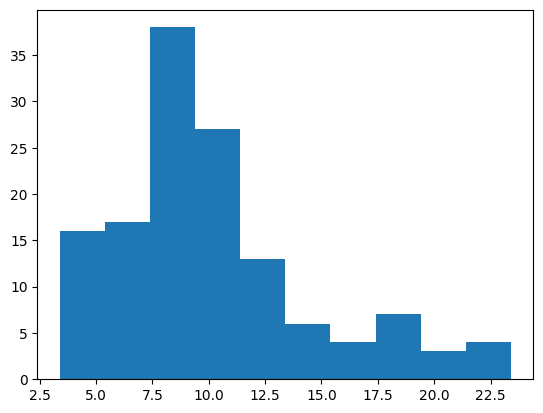

In [6]:
plt.hist(traffic['Slowness in traffic (%)'])


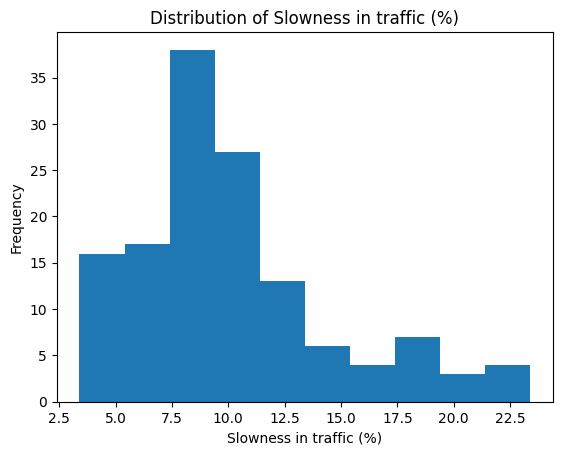

In [7]:
traffic['Slowness in traffic (%)'].plot.hist()
plt.xlabel('Slowness in traffic (%)')
plt.title('Distribution of Slowness in traffic (%)')
plt.show()


In [8]:
incidents = traffic.drop(['Hour (Coded)', 'Slowness in traffic (%)'],
                        axis=1)
print(incidents.sum())

Immobilized bus                           46
Broken Truck                             118
Vehicle excess                             4
Accident victim                           57
Running over                              16
Fire vehicles                              1
Occurrence involving freight               1
Incident involving dangerous freight       1
Lack of electricity                       16
Fire                                       1
Point of flooding                         16
Manifestations                             7
Defect in the network of trolleybuses     31
Tree on the road                           6
Semaphore off                             17
Intermittent Semaphore                     2
dtype: int64


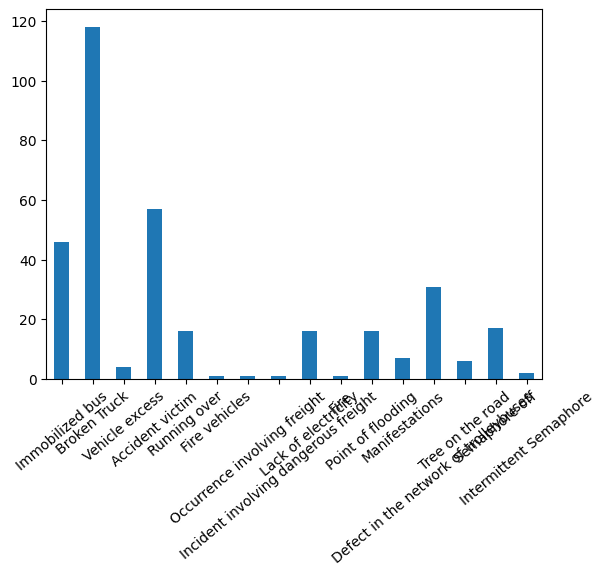

In [9]:
incidents.sum().plot.bar()
plt.xticks(rotation=40)
plt.show()

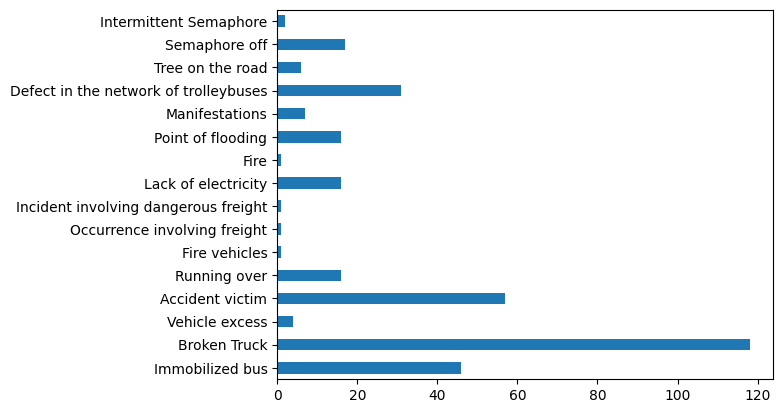

In [10]:
incidents.sum().plot.barh()
plt.show()

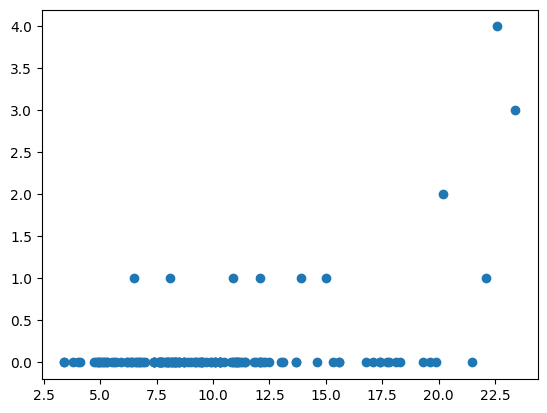

In [11]:
plt.scatter(traffic['Slowness in traffic (%)'],
            traffic['Lack of electricity'])
plt.show()

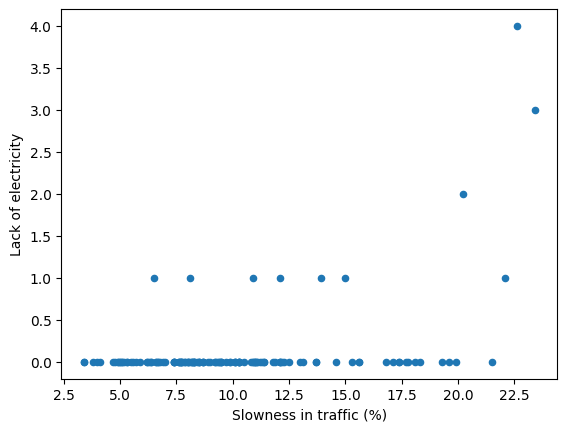

In [12]:
traffic.plot.scatter(x='Slowness in traffic (%)',
                     y='Lack of electricity')
plt.show()

<Axes: xlabel='Slowness in traffic (%)', ylabel='Point of flooding'>

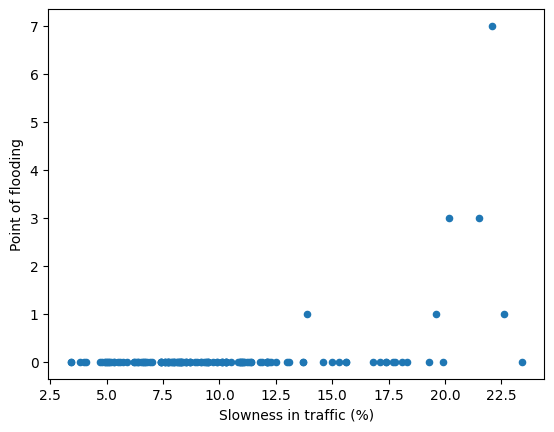

In [13]:
traffic.plot.scatter(x="Slowness in traffic (%)",y="Point of flooding")

To visualize the correlation between any two columns, we can use a scatter plot. Let's start with generating a scatter plot for Slowness in traffic (%) and Lack of electricity.

<Axes: xlabel='Slowness in traffic (%)', ylabel='Semaphore off'>

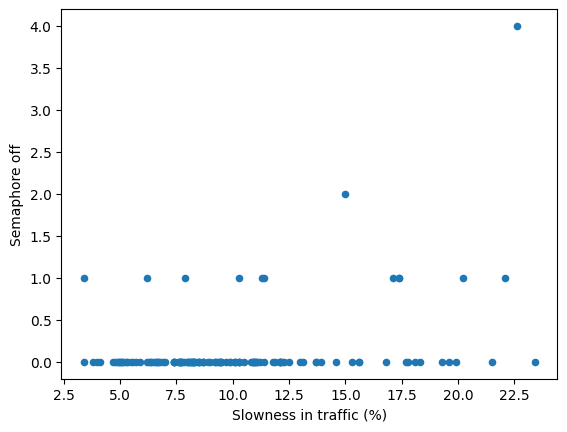

In [14]:
traffic.plot.scatter(x="Slowness in traffic (%)",y="Semaphore off")

<Axes: >

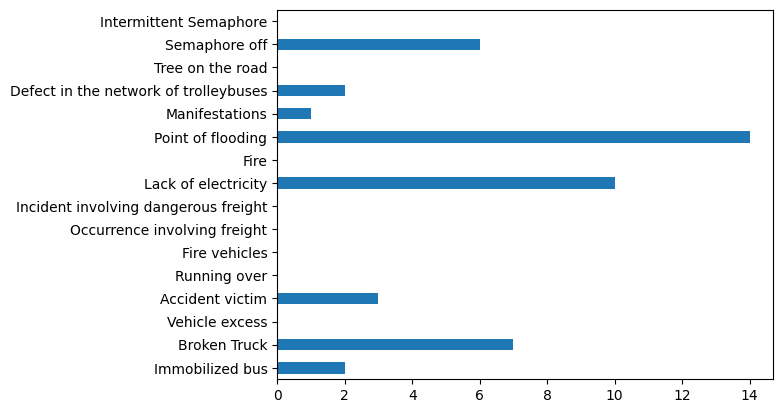

In [15]:
slowness_20_or_more=traffic[traffic['Slowness in traffic (%)'] >= 20] #slowness_20_or_more = traffic[traffic['Slowness in traffic (%)'] >= 20]
slowness_20_or_more=slowness_20_or_more.drop(['Slowness in traffic (%)','Hour (Coded)'],axis=1)
incident_frequencies=slowness_20_or_more.sum()
incident_frequencies.plot.barh()

In [16]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
traffic_per_day = {}
for i, day in zip(range(0, 135, 27), days):
    each_day_traffic = traffic[i:i+27]
    traffic_per_day[day] = each_day_traffic


In [17]:
print(traffic_per_day['Monday'].head(3))

   Hour (Coded)  Immobilized bus  Broken Truck  Vehicle excess  \
0             1                0             0               0   
1             2                0             0               0   
2             3                0             0               0   

   Accident victim  Running over  Fire vehicles  Occurrence involving freight  \
0                0             0              0                             0   
1                0             0              0                             0   
2                0             0              0                             0   

   Incident involving dangerous freight  Lack of electricity  Fire  \
0                                     0                    0     0   
1                                     0                    0     0   
2                                     0                    0     0   

   Point of flooding  Manifestations  Defect in the network of trolleybuses  \
0                  0               0              

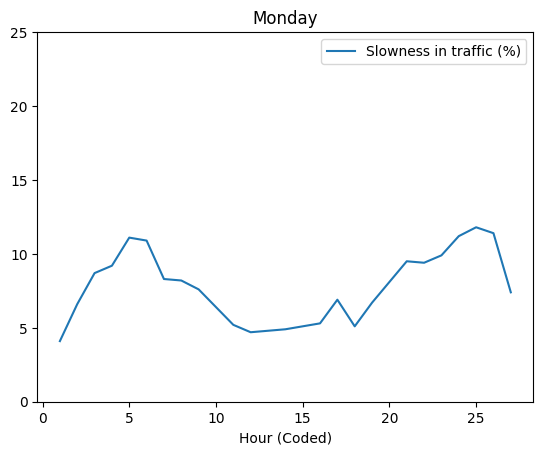

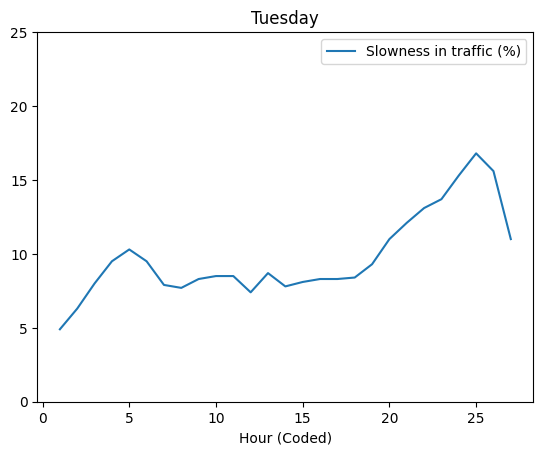

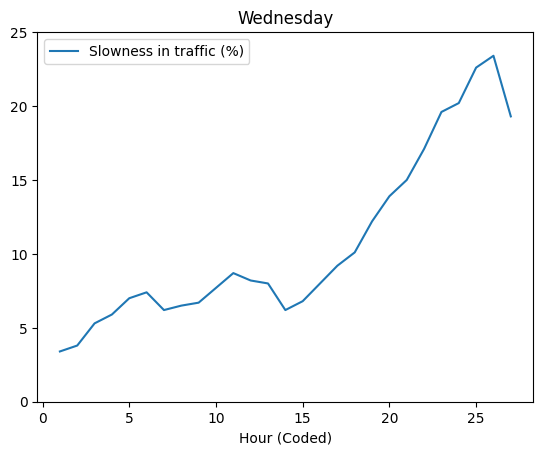

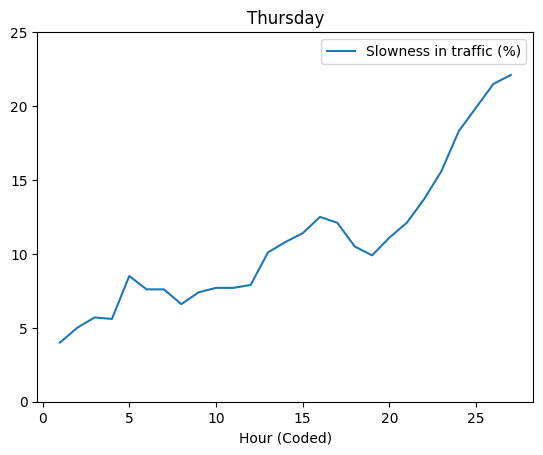

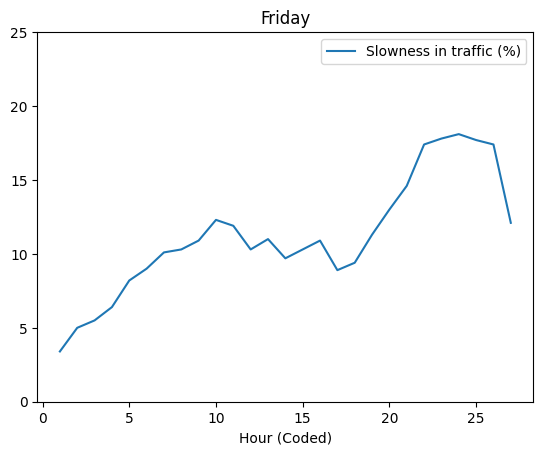

In [18]:
for row in days:
    traffic_per_day[row].plot.line(x='Hour (Coded)',y='Slowness in traffic (%)')
    plt.title(row)
    plt.ylim([0, 25])
    plt.show()
    
    

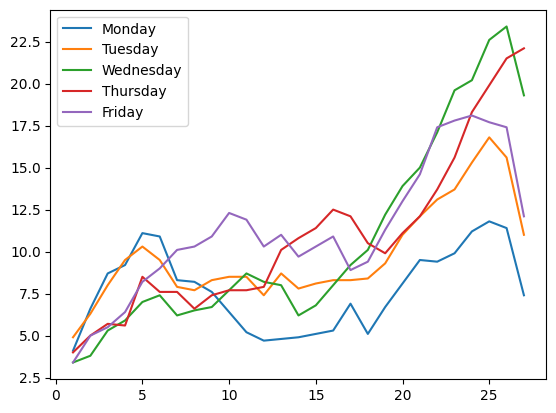

In [19]:
for day in days:
    plt.plot(traffic_per_day[day]['Hour (Coded)'],
             traffic_per_day[day]['Slowness in traffic (%)'],
             label=day)

plt.legend()

<Axes: >

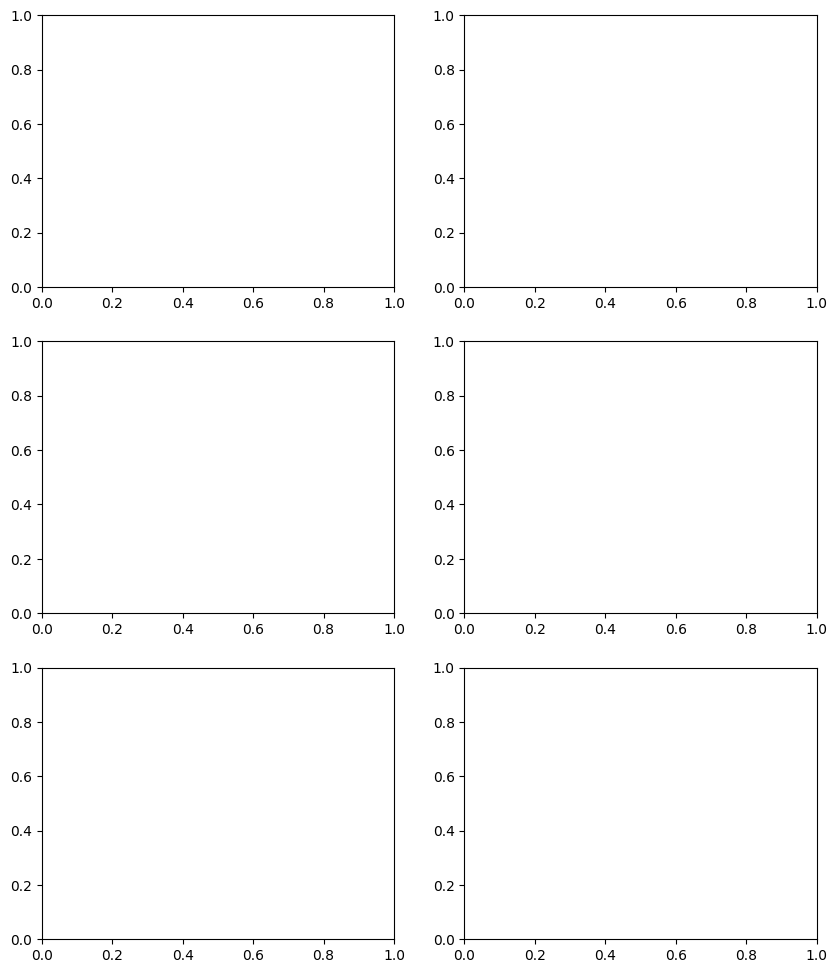

In [20]:

plt.figure(figsize=(10, 12))
plt.subplot(3, 2, 1)
plt.subplot(3, 2, 2)
plt.subplot(3, 2, 6)

plt.subplot(3,2,3)
plt.subplot(3,2,4)
plt.subplot(3,2,5)


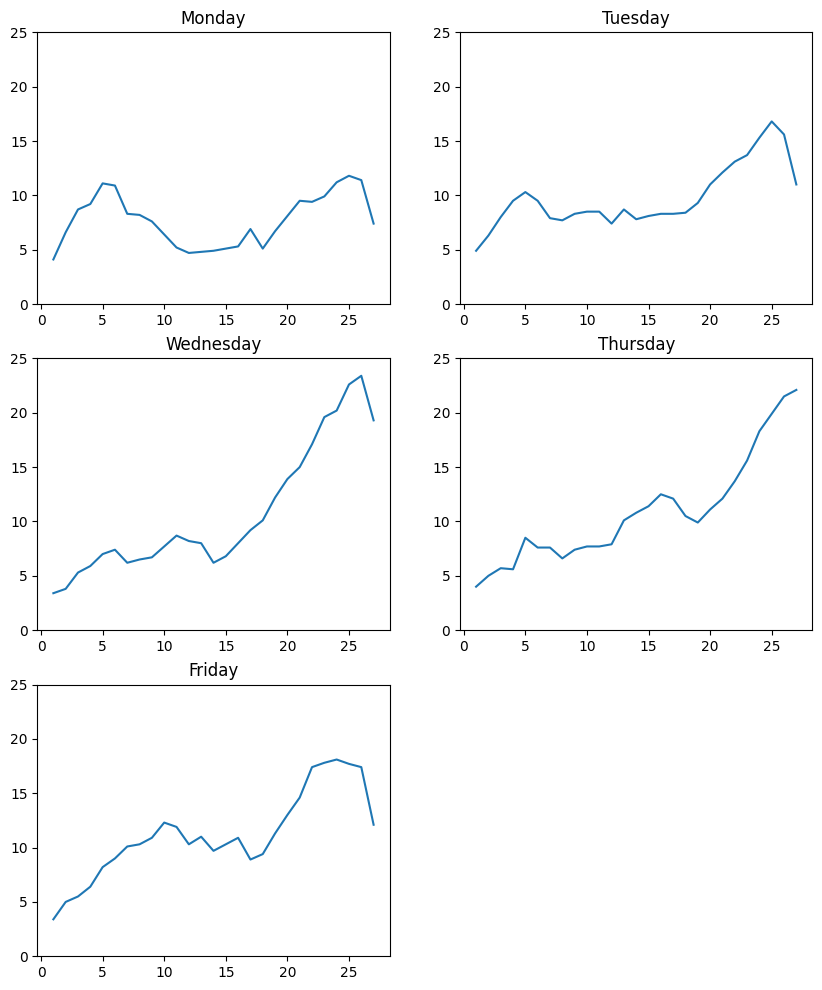

In [21]:
plt.figure(figsize=(10,12))
for i,day in zip(range(1,6),days):
    plt.subplot(3,2,i)
    plt.plot(traffic_per_day[day]['Hour (Coded)'],traffic_per_day[day]['Slowness in traffic (%)'])
    plt.title(day)
    plt.ylim({0,25})

(0.0, 25.0)

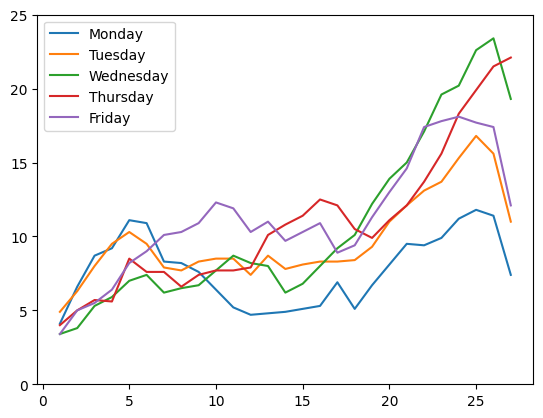

In [22]:
for day in days:
    plt.plot(traffic_per_day[day]['Hour (Coded)'],traffic_per_day[day]['Slowness in traffic (%)'],label=day)
plt.legend()
plt.ylim([0,25])